# Importing 

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import talib
import pynance as pn
import os

# Loading and preparing the Data

In [23]:
file_path = r"D:/programming/python tenx/Financial-news-sentiment-stock-analysis/Data/yfinance_data/AAPL_historical_data.csv" 
df = pd.read_csv(file_path)

df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.sort_index(inplace=True)

df = df[['Open', 'High', 'Low', 'Close', 'Volume']].dropna()

# TA-Lib indicators

In [24]:
df['SMA_20'] = talib.SMA(df['Close'], timeperiod=20)
df['RSI_14'] = talib.RSI(df['Close'], timeperiod=14)
df['MACD'], df['MACD_signal'], df['MACD_hist'] = talib.MACD(df['Close'])

# Visualization

SMA

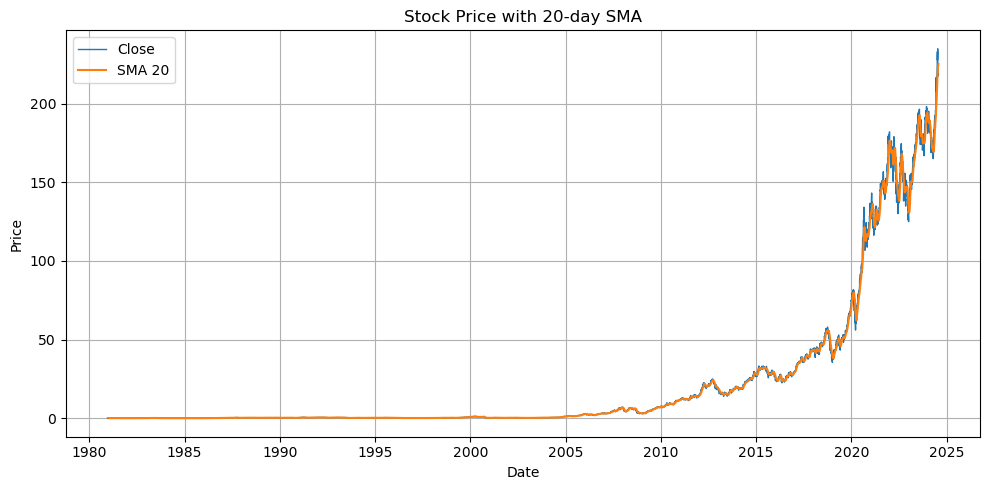

In [25]:
plt.figure(figsize=(10, 5))
plt.plot(df['Close'], label='Close', linewidth=1)
plt.plot(df['SMA_20'], label='SMA 20', linewidth=1.5)
plt.title('Stock Price with 20-day SMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

RSI

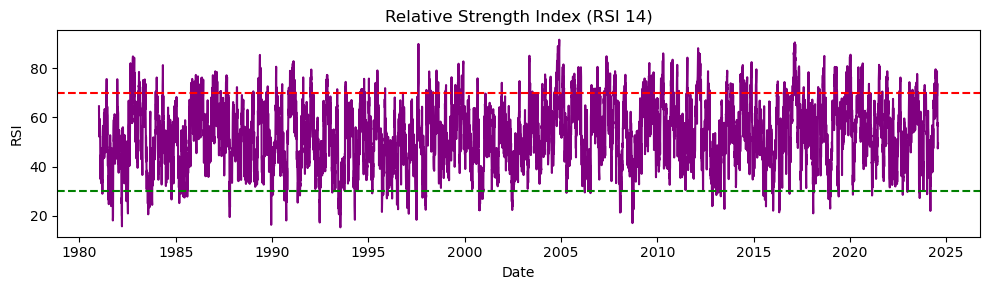

In [26]:
plt.figure(figsize=(10, 3))
plt.plot(df['RSI_14'], color='purple')
plt.axhline(70, color='red', linestyle='--')
plt.axhline(30, color='green', linestyle='--')
plt.title('Relative Strength Index (RSI 14)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.tight_layout()
plt.show()

MACD

C:\Users\Administrator\AppData\Local\Temp\ipykernel_20120\1203611864.py:8: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\Administrator\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


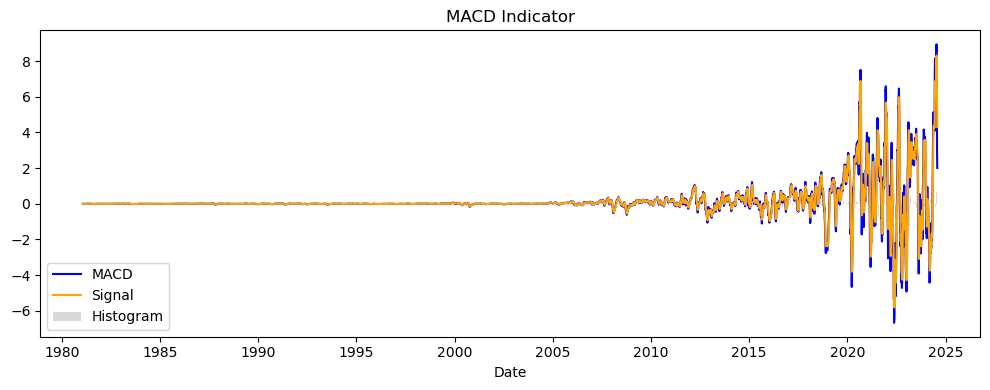

In [27]:
plt.figure(figsize=(10, 4))
plt.plot(df['MACD'], label='MACD', color='blue')
plt.plot(df['MACD_signal'], label='Signal', color='orange')
plt.bar(df.index, df['MACD_hist'], label='Histogram', color='gray', alpha=0.3)
plt.title('MACD Indicator')
plt.xlabel('Date')
plt.legend()
plt.tight_layout()
plt.show()